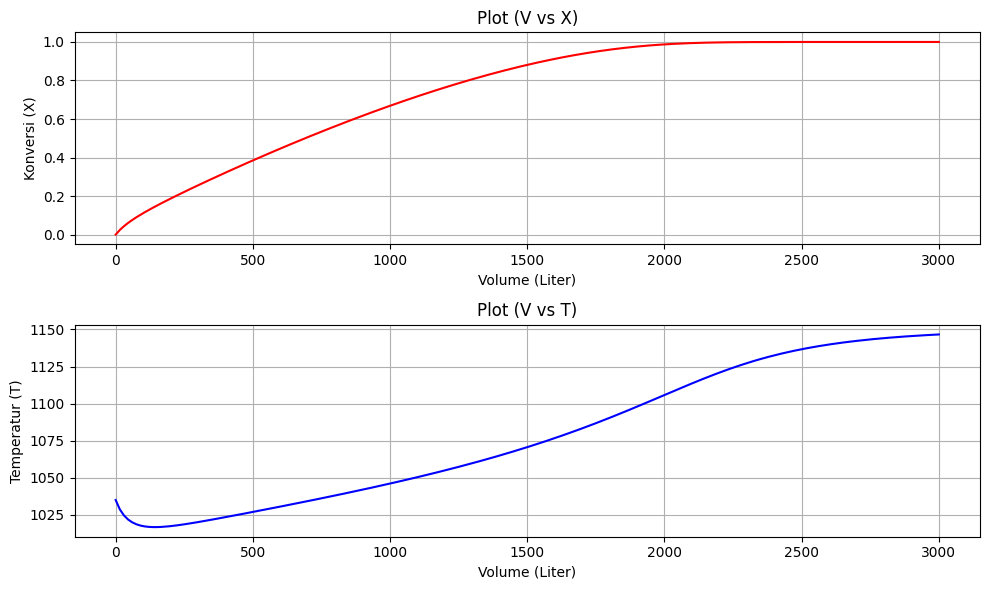

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Fungsi yang mendefinisikan PFR
def PFR(XT, V, FA0=0.0376, CA0=0.0188, T0=1035, U=110, Ta=1150):
    X = XT[0]  # Konversi
    T = XT[1]  # Temperatur
    
    # Konstanta termodinamika
    dHA = -216670  # J/mol
    dHB = -61090   # J/mol
    dHC = -74810   # J/mol
    dHrTr = dHC + dHB - dHA  # Panas reaksi pada suhu referensi
    CpA = 163     # J/mol.K
    CpB = 83      # J/mol.K
    CpC = 71      # J/mol.K
    deltaCp = CpC + CpB - CpA  # Delta Cp
    Tr = 298      # Suhu referensi, K
    dHrT = dHrTr + deltaCp * (T - Tr)  # Panas reaksi pada suhu T
    
    # Parameter reaktor
    D = (1.315 - 0.133) * 0.0234  # Diameter
    a = 4 / (D * 1000)  # Area permukaan per volume
    v0 = FA0 / CA0  # Kecepatan aliran volumetrik
    
    # Laju reaksi
    k0 = np.exp(34.35 - 34222 / T0)  # k pada suhu T0
    k = k0 * np.exp(34222 * (1 / T0 - 1 / T))  # k pada suhu T
    CA = CA0 * (1 - X) * T0 / ((1 + X) * T)  # Konsentrasi A
    rA = k * CA  # Laju reaksi
    
    # Persamaan diferensial
    dXdV = rA / FA0  # Perubahan konversi terhadap volume
    dTdV = ((U * a * (Ta - T)) + (rA * (-dHrT))) / (FA0 * (CpA + deltaCp * X))  # Perubahan suhu terhadap volume
    
    return [dXdV, dTdV]

# Kondisi awal
V0 = 0  # Volume awal
T0 = 1035  # Suhu awal
X0 = 0  # Konversi awal
XT0 = [X0, T0]  # Nilai awal untuk X dan T

# Range volume
V = np.linspace(0, 3, 200)  # Volume dari 0 hingga 2 liter, dengan 200 titik

# Pemecahan ODE
sol = odeint(PFR, XT0, V)

# Ekstraksi hasil
X = sol[:, 0]  # Konversi
T = sol[:, 1]  # Suhu

# Plot hasil
plt.figure(figsize=(10, 6))

# Plot V vs X
plt.subplot(211)
plt.plot(V * 1000, X, 'r-', label='X (Konversi)')
plt.title('Plot (V vs X)')
plt.ylabel('Konversi (X)')
plt.xlabel('Volume (Liter)')
plt.grid(True)

# Plot V vs T
plt.subplot(212)
plt.plot(V * 1000, T, 'b-', label='T (Temperatur)')
plt.title('Plot (V vs T)')
plt.ylabel('Temperatur (T)')
plt.xlabel('Volume (Liter)')
plt.grid(True)

# Menampilkan plot
plt.tight_layout()
plt.show()
